# Project description
In conjunction with marketing department of big online store we compiled a list of hypotheses that may help boost revenue.

Now we need to prioritize these hypotheses, launch an A/B test, and analyze the results.

<a id="context"></a>
# Table of contents
- [Part 0](#preprocess) Preprocessing data
- [Part 1](#priority) Prioritizing Hypotheses
    1. Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
    2. Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
    3. Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.
- [Part 2](#AB) A/B Test Analysis
    - [1](#ab1) Graph cumulative revenue by group. Make conclusions and conjectures.
    - [2](#ab2) Graph cumulative average order size by group. Make conclusions and conjectures.
    - [3](#ab3) Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
    - [4](#ab4) Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
    - [5](#ab5) Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
    - [6](#ab6) Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
    - [7](#ab7) Plot a scatter chart of order prices. Make conclusions and conjectures.
    - [8](#ab8) Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
    - [9](#ab9) Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
    - [10](#ab10) Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
    - [11](#ab11) Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
    - [12](#ab12) Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
    - [13](#ab13) Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.
- [Conclusion](#conclusion)

<a id="preprocess"></a>
# Preprocessing data
[back to table of contents](#context)

In [1]:
!pip install --upgrade pandas

     |████████████████████████████████| 11.4 MB 678 kB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os.path
from IPython.display import display, display_html
from IPython.display import Markdown as md
from scipy import stats as st
import seaborn as sns

Download slice of data to see what we can possibly fix at this stage

In [28]:
try:
    hypotheses = pd.read_csv('/Users/stainer/Desktop/Jupyter/Project_07/hypotheses_us.csv', nrows=100)
    orders = pd.read_csv('/Users/stainer/Desktop/Jupyter/Project_07/orders_us.csv', nrows=100)
    visits = pd.read_csv('/Users/stainer/Desktop/Jupyter/Project_07/visits_us.csv', nrows=100)
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', nrows=100)
    orders = pd.read_csv('/datasets/orders_us.csv', nrows=100)
    visits = pd.read_csv('/datasets/visits_us.csv', nrows=100)

In [32]:
display(hypotheses.head(10), hypotheses.info(), hypotheses.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


None

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [33]:
display(orders.head(10), orders.info(), orders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  100 non-null    int64  
 1   visitorId      100 non-null    int64  
 2   date           100 non-null    object 
 3   revenue        100 non-null    float64
 4   group          100 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


None

,transactionId,visitorId,revenue
count,1.000000e+02,1.000000e+02,100.00000
mean,1.963140e+09,1.973720e+09,99.53800
std,1.168557e+09,1.253651e+09,140.43636
min,4.919758e+06,5.114589e+06,5.50000
25%,1.065579e+09,9.273579e+08,20.20000
50%,1.956326e+09,2.106086e+09,40.20000
75%,2.833232e+09,2.990295e+09,120.20000
max,4.252514e+09,4.256040e+09,875.50000


In [34]:
display(visits.head(10), visits.info(), visits.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


None

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


## Problems with data:
- hypotheses: 
    - separator ';'
    - column names to lower case
- orders:
    - date object -> datetime
- visits:
    - date object -> datetime

Download full data sets

In [95]:
try:
    hypotheses = pd.read_csv('/Users/stainer/Desktop/Jupyter/Project_07/hypotheses_us.csv', 
                             sep = ';',
                             header = 0,
                             names = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']
                            )
    orders = pd.read_csv('/Users/stainer/Desktop/Jupyter/Project_07/orders_us.csv',
                         parse_dates = ['date'],
                        )
    visits = pd.read_csv('/Users/stainer/Desktop/Jupyter/Project_07/visits_us.csv',
                         parse_dates = ['date']
                        )
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',
                             sep = ';',
                             header = 0,
                             names = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']
                            )
    orders = pd.read_csv('/datasets/orders_us.csv',
                         parse_dates = ['date'],
                        )
    visits = pd.read_csv('/datasets/visits_us.csv',
                         parse_dates = ['date'],
                        )

In [92]:
display(hypotheses.head(10), hypotheses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


None

In [93]:
display(orders.head(10), orders.info(), orders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


Check whether there are users that ended up in both groups

In [189]:
groupA = orders[orders['group']=='A']['visitorId'].drop_duplicates()
groupB = orders[orders['group']=='B']['visitorId'].drop_duplicates()
usersUniqueToGroups = orders[np.logical_not(np.logical_and(orders['visitorId'].isin(groupA),orders['visitorId'].isin(groupB)))]['visitorId'].drop_duplicates()

0       3312258926
1       3642806036
3       1196621759
4       2322279887
5        935554773
           ...    
1191     608641596
1192    3733762160
1193     370388673
1194     573423106
1196    2108080724
Name: visitorId, Length: 973, dtype: int64

Compile table with users that are unique to each group

In [138]:
orders_ = orders[orders['visitorId'].isin(usersUniqueToGroups)]
orders_

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [65]:
display(visits.head(10), visits.info(), visits.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


None

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<a id="priority"></a>
# Prioritizing Hypotheses

ICE = (impact * confidence) / effort

RICE = (reach * impact * confidence) / effort

[back to table of contents](#context)

In [207]:
pd.options.display.max_colwidth = 150
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


In [211]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
display(hypotheses[['hypothesis','ICE']].sort_values('ICE', ascending=False))
display(hypotheses[['hypothesis','RICE']].sort_values('RICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Conclusions:

Looking at these tables we can see that ICE method represents how effective implicated changes will be for individual user, where RICE takes into account proportion of users that will be affected by said changes.

This way, we can see that despite effetivity of birthday discounts (it leads our ICE rating), user really feels it once a year.

At the same time addition of subscriptin forms is less impactfull (filling a form os less appealing than getting a discount) but every user is going to see this form every time he interract with the site, so this route's reach is much higher. And this hypothesis leads RICE rating by significant margin.

<a id="AB"></a>
# A/B Test Analysis

[back to table of contents](#context)

In [218]:
datesGroups = orders_[['date','group']].drop_duplicates()

In [219]:
cumulativeOrders = datesGroups.apply(lambda x: orders_[np.logical_and(orders_['date'] <= x['date'], orders_['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeVisits = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [221]:
cumulativeData = cumulativeOrders.merge(cumulativeVisits, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

We aggregated in one table data on daily cumulative orders(number of orders, unique byuers and revenue) and visitors

<a id="ab1"></a>
## Graph cumulative revenue by group. Make conclusions and conjectures.

[back to table of contents](#context)

In [140]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue']]

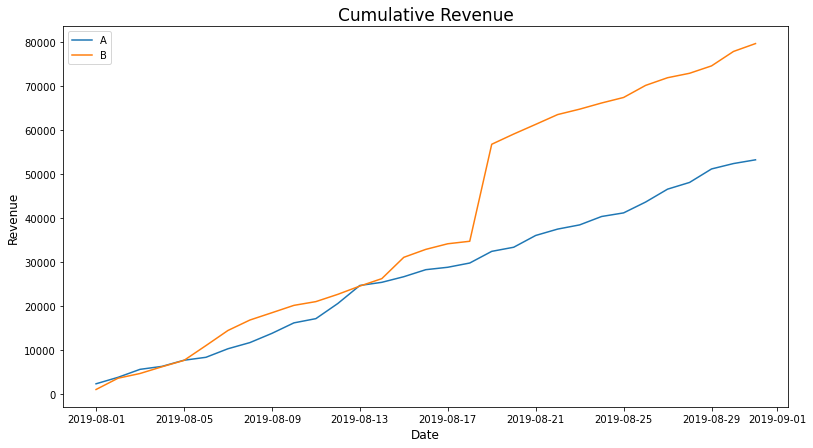

In [226]:
plt.figure(figsize=(13,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative Revenue', fontsize=17)
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend();

Conclusions:

-  We see steady growth of comulative revenue.
- Group B shows overall better results
- Sudden jump in group B revenue could point our attention on poential outliers. High extremely high order price or high number of orders.

<a id="ab2"></a>
## Graph cumulative average order size by group. Make conclusions and conjectures.

[back to table of contents](#context)

In [228]:
cumulativeAvgOrderSizeA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeAvgOrderSizeB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

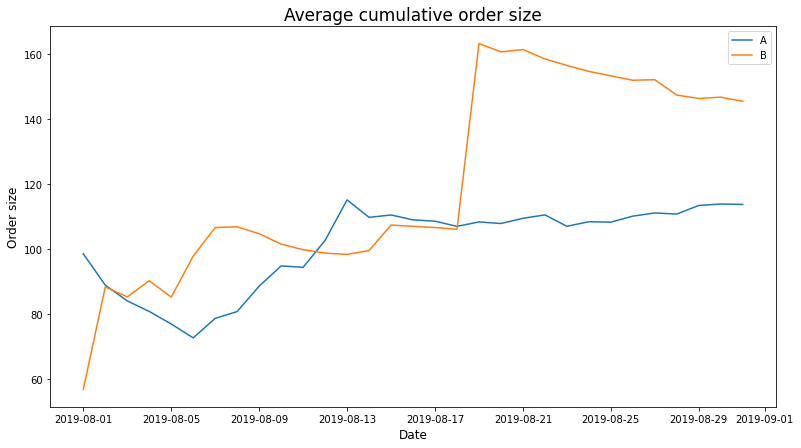

In [229]:
plt.figure(figsize=(13,7))
plt.plot(cumulativeAvgOrderSizeA['date'], cumulativeAvgOrderSizeA['revenue']/cumulativeAvgOrderSizeA['orders'], label='A')
plt.plot(cumulativeAvgOrderSizeB['date'], cumulativeAvgOrderSizeB['revenue']/cumulativeAvgOrderSizeB['orders'], label='B')
plt.title('Average cumulative order size', fontsize=17)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order size', fontsize=12)
plt.legend();

Conclusions:

- Yet again we see spike around 19-08-2019. This points at an outlier with extremely high purchase size.
- Group B seem to have better metrics but they could be missleading because of the outliers

<a id="ab3"></a>
## Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

[back to table of contents](#context)

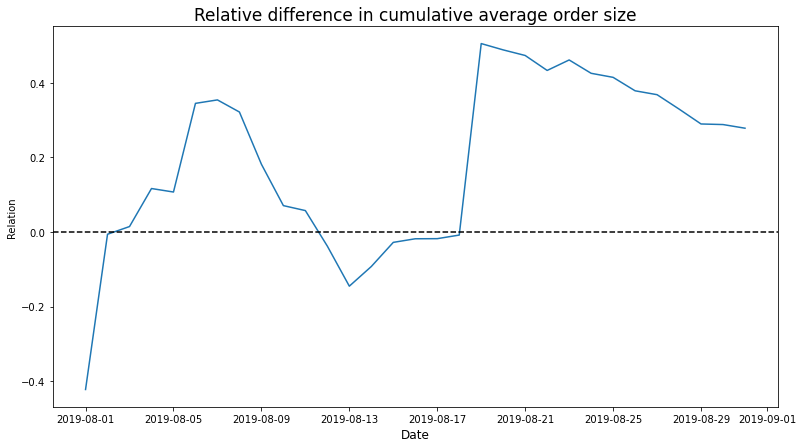

In [240]:
mergedCumulativeAvgOrderSize = cumulativeAvgOrderSizeA.merge(cumulativeAvgOrderSizeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13,7))
plt.title('Relative difference in cumulative average order size', fontsize=17)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Relation')
plt.plot(mergedCumulativeAvgOrderSize['date'], (mergedCumulativeAvgOrderSize['revenueB']/mergedCumulativeAvgOrderSize['ordersB'])/(mergedCumulativeAvgOrderSize['revenueA']/mergedCumulativeAvgOrderSize['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--');

Conclusions:

- We see that group B metric is better more often then not
- However important to note that this graph is also distorted by outliers and it's hard to make conclusions solely on it
- After the spike graph have tendency to gravitate back towards the 0 differnce line.
- Later, when we order values more closely outliers we could plot these graphs again accounting for outliers, this could possibly clear the picture

<a id="ab4"></a>
## Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

[back to table of contents](#context)

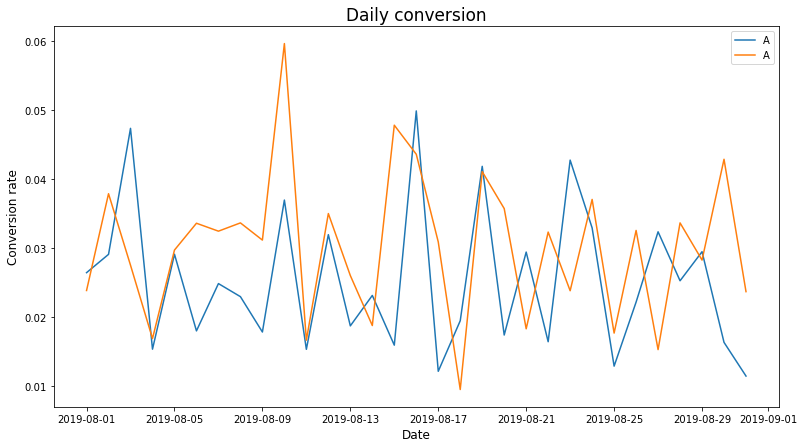

In [262]:
numberOfOrders = datesGroups.apply(lambda x: orders_[np.logical_and(orders_['date']==x['date'], orders_['group']==x['group'])].agg({'date':'max', 'group':'max', 'visitorId':'nunique'}), axis=1).sort_values(['date','group'])
numberOfOrders.columns = ['date','group','buyers']
numberOfVisits = datesGroups.apply(lambda x: visits[np.logical_and(visits['date']==x['date'],visits['group']==x['group'])].agg({'date':'max', 'group':'max', 'visits':'sum'}), axis=1).sort_values(['date','group'])
conversion = numberOfOrders.merge(numberOfVisits, left_on=['date','group'], right_on=['date','group'], suffixes=['A','B'])
conversion['conversion'] = conversion['buyers']/conversion['visits']

plt.figure(figsize=(13,7))
plt.title('Daily conversion', fontsize=17)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion rate', fontsize=12)
plt.plot(conversion[conversion['group']=='A']['date'], conversion[conversion['group']=='A']['conversion'], label='A')
plt.plot(conversion[conversion['group']=='B']['date'], conversion[conversion['group']=='B']['conversion'], label='A')
plt.legend();

It's hard to see anything from daily conversion rates.

We're going to calculate cumulative average conversion rate

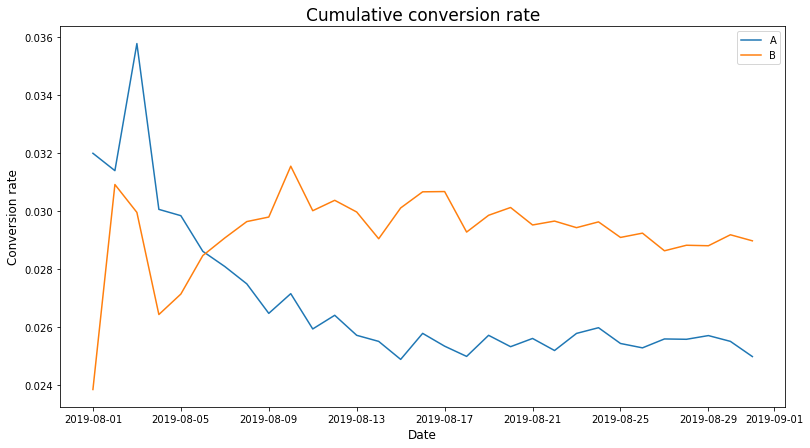

In [263]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(13,7))
plt.title('Cumulative conversion rate', fontsize=17)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion rate', fontsize=12)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

Conclusions:

- After some spikes in first couple of days graph seem to stabilize
- Conversion rate for group B is higher (approximately by 1% relatively)

<a id="ab5"></a>
## Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

[back to table of contents](#context)

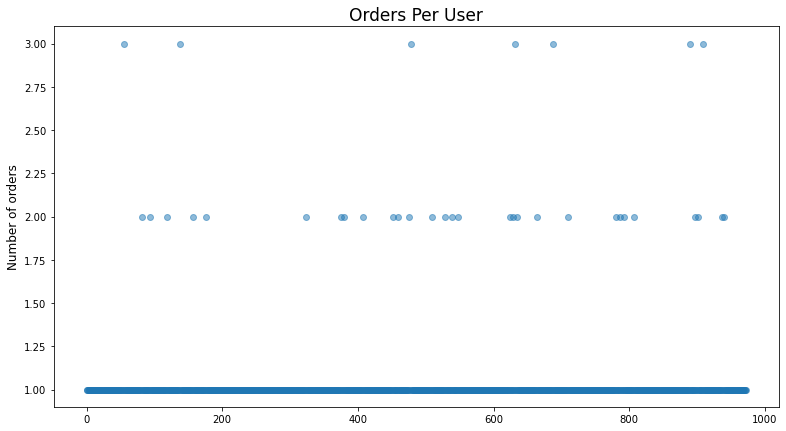

In [267]:
ordersPerUser = orders_.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersPerUser.columns = ['user', 'orders']

x_values = np.arange(0,len(ordersPerUser))

plt.figure(figsize=(13,7))
plt.title('Orders Per User', fontsize=17)
plt.ylabel('Number of orders', fontsize=12)
plt.scatter(x_values, ordersPerUser['orders'], alpha=0.5);

In [333]:
heavyBuyers = ordersPerUser[ordersPerUser['orders']>1]['user']

Conclusions:

- We see that vast majority of users make one, sometimes two orders.
- We have no users with more than 3 orders, and they are also very rare
- Created data set with Ids of users with high number of orders

<a id="ab6"></a>
## Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

[back to table of contents](#context)

In [269]:
np.percentile(ordersPerUser['orders'],[95,99])

array([1., 2.])

In [289]:
len(ordersPerUser[ordersPerUser['orders']>1])/len(ordersPerUser['orders'])

0.03699897225077081

Conclusions:

- Less than 5% of users place more than one order
- Less than 1% of users place 3 orders
- In fact only 3.7% of users placed more than 1 order. We will use 1 order as an upper limit while filtering the data

<a id="ab7"></a>
## Plot a scatter chart of order prices. Make conclusions and conjectures.

[back to table of contents](#context)

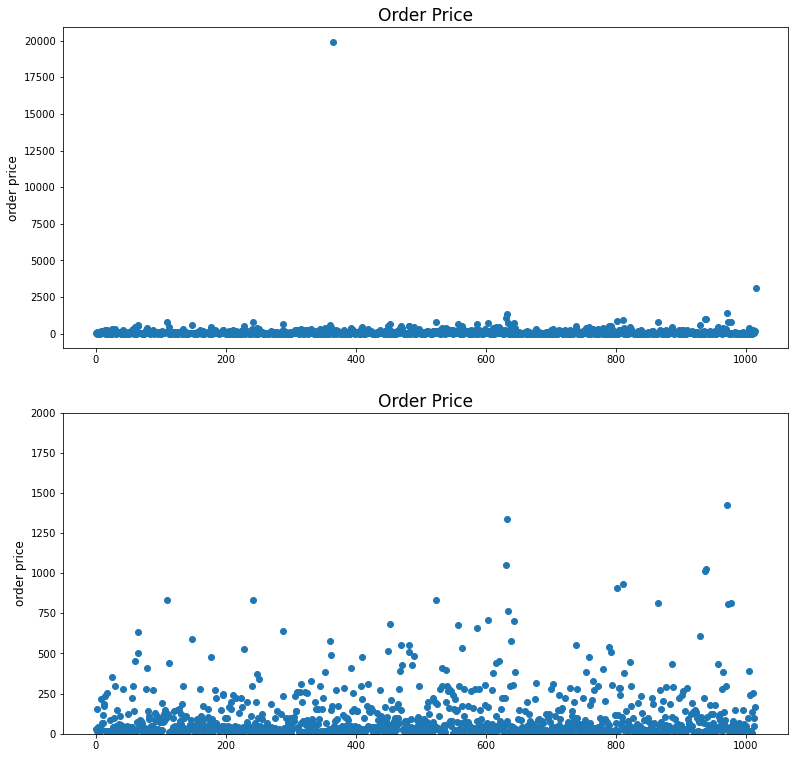

In [288]:
x_values = np.arange(0,len(orders_['revenue']))

fig, ax = plt.subplots(2,1,figsize=(13,13))
ax[0].scatter(x_values, orders_['revenue'])
ax[0].set_title('Order Price',fontsize=17)
ax[0].set_ylabel('order price', fontsize=12)

ax[1].scatter(x_values, orders_['revenue'])
ax[1].set_ylim(0,2000)
ax[1].set_title('Order Price', fontsize=17)
ax[1].set_ylabel('order price', fontsize=12);

Conclusions:

- Aside from couple of outliers most of the orders seem to fall under 1000$

<a id="ab8"></a>
## Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

[back to table of contents](#context)

In [149]:
np.percentile(orders_['revenue'],[95,99])

array([414.275, 830.3  ])

Conclusions:

- Only 5% of users spent more than 415
- Only 1% of users spent more than 830
- When filtering we will use 830 threshhold as the upper limit

<a id="ab9"></a>
## Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

[back to table of contents](#context)

In [296]:
#List of users from group A with number of orders they made
ordersByUsersA = orders_[orders_['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['user','orders']

#List of users from group B with number of orders they made
ordersByUsersB = orders_[orders_['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['user','orders']

#Series with length equal to total number of visitors, composed of data on number of orders users made supplemented by zeros
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

alpha = .01

result = st.mannwhitneyu(sampleA, sampleB, alternative='less')
p_value = result[1]

print("P_value: {0:.4f}".format(p_value))

print("Average relative difference: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

P_value: 0.0055
Average relative difference: 0.160
Null hypothesis rejected: the difference is statistically significant


Conclusions:

- Difference between group's conversion is statisticly significant.
- Thus we come to a conclusion that conversion in Group B is higher than in group A.
- On average it's 16% higher. It doesn't seem a lot, but in a bigger picture could lead to tangible increase in revenue

<a id="ab10"></a>
## Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

[back to table of contents](#context)

In [304]:
sampleA = orders_[orders_['group']=='A']['revenue']
sampleB = orders_[orders['group']=='B']['revenue']

alpha = .01

result = st.mannwhitneyu(sampleA, sampleB, alternative='less')
p_value = result[1]

print("{0:.4f}".format(p_value))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

0.5690
0.278
Failed to reject the null hypothesis: we can't make conclusions about the difference


Conclusions:

- p value is much higher than alpha we chose
- We can't make conclusions about difference in average order size despite mean of group B is 27% higher

<a id="ab11"></a>
## Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

[back to table of contents](#context)

In [315]:
ordersByUsersA = orders_[orders_['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['user','orders']

ordersByUsersB = orders_[orders_['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['user','orders']

sampleFilteredA = pd.concat([ordersByUsersA[ordersByUsersA['orders']<2]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA[ordersByUsersA['orders']<2])), name='orders')], axis=0)
sampleFilteredB = pd.concat([ordersByUsersB[ordersByUsersB['orders']<2]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB[ordersByUsersB['orders']<2])), name='orders')], axis=0)

alpha = .01

result = st.mannwhitneyu(sampleFilteredA, sampleFilteredB, alternative='less')
p_value = result[1]

print("P_value: {0:.4f}".format(p_value))

print("Average relative difference: {0:.3f}".format(sampleFilteredB.mean()/sampleFilteredA.mean()-1)) 

if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

P_value: 0.0047
Average relative difference: 0.183
Null hypothesis rejected: the difference is statistically significant


Conclusions after removing outliers:

- Difference between group's conversion is statisticly significant.
- Thus we come to a conclusion that conversion in Group B is higher than in group A.
- Without outliers grop B's lead over group A in conversion rate is even higher at relative 18%

<a id="ab12"></a>
## Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

[back to table of contents](#context)

In [316]:
sampleFilteredA = orders_[np.logical_and(orders_['group']=='A', orders_['revenue']<830)]['revenue']
sampleFilteredB = orders_[np.logical_and(orders_['group']=='B', orders_['revenue']<830)]['revenue']

alpha = .01

result = st.mannwhitneyu(sampleFilteredA, sampleFilteredB, alternative='less')
p_value = result[1]

print("{0:.4f}".format(p_value))

print("{0:.3f}".format(sampleFilteredB.mean()/sampleFilteredA.mean()-1)) 

if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

0.5059
-0.014
Failed to reject the null hypothesis: we can't make conclusions about the difference


Conclusions after removing outliers:

- Group B average order size beacame slightly lower than in group A
- Difference between data we got from groups is still not statisticly significant
- Thus we can't make conclusions about difference in average order size

<a id="ab13"></a>
## Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

[back to table of contents](#context)

Based on the test results we recomend to stop the test and consider group B a leader.

Reasons for that:
- No significant difference in average order size
- Conversion rate is 16-18% higher 
- This results in higher revenue

<a id="conclusion"></a>
# Conclusion
During this project we:
- Downloaded data sets while fixing some minor problems like data types and column names.
- Discovered number of users that ended up in both test groups. Filled report to appropriate department.
- Analysed and prioritized hypotheses based on reach,impact,confidence and effort evaluations.
- Analyzed A/B test data:
    - Revenue : group B revenue is higher. Hints on potential outliers.
    - Average order size: no clear conclusion. Hints on potential outliers.
    - Conversion rate: Daily graph is not informative. Comulative conversion rate for group B is higher
    - Number of orders per user and average order size. Highlited outliers for future filtering and saved users with high number of orders in separate data set.
    - Conducted Wilcoxon-Mann-Whitney test on conversion data of two groups. Raw and filtered. Group B conversion rate is significantly higher (16-18%)
    - Conducted Wilcoxon-Mann-Whitney test on average purchase size data of two groups. Found no ground to conclude there is significant difference between groups.
    - Recomended to stop the test and conclude that group B is the leader.
    
[back to table of contents](#context)

# P.S.
In section where we investigated comulative revenue and average order size prior to determining outliers we said that spikes we the result of said outliers. And withou them graphs could shed light on the situations.

Let's see.

In [334]:
datesGroups_ = orders_[['date','group']].drop_duplicates()

In [335]:
cumulativeOrders_ = datesGroups.apply(lambda x: orders_[np.logical_and(orders_['revenue']<830,np.logical_and(orders_['date'] <= x['date'], orders_['group'] == x['group']))].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeVisits_ = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])



In [336]:
cumulativeData_ = cumulativeOrders_.merge(cumulativeVisits_, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [337]:
cumulativeRevenueA_ = cumulativeData_[cumulativeData_['group']=='A'][['date','revenue']]
cumulativeRevenueB_ = cumulativeData_[cumulativeData_['group']=='B'][['date','revenue']]

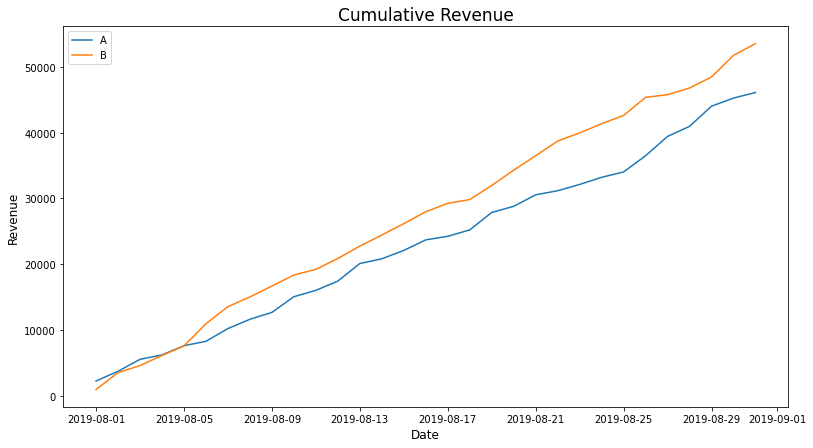

In [338]:
plt.figure(figsize=(13,7))
plt.plot(cumulativeRevenueA_['date'], cumulativeRevenueA_['revenue'], label='A')
plt.plot(cumulativeRevenueB_['date'], cumulativeRevenueB_['revenue'], label='B')
plt.title('Cumulative Revenue', fontsize=17)
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend();

In [339]:
cumulativeAvgOrderSizeA_ = cumulativeData_[cumulativeData_['group']=='A'][['date','revenue', 'orders']]
cumulativeAvgOrderSizeB_ = cumulativeData_[cumulativeData_['group']=='B'][['date','revenue', 'orders']]

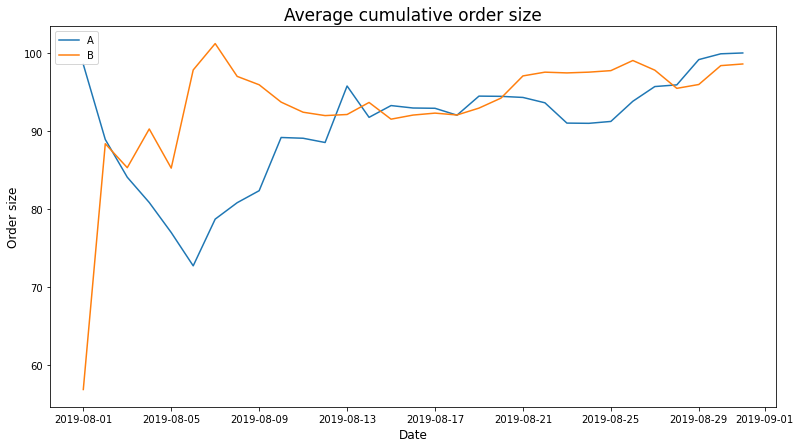

In [340]:
plt.figure(figsize=(13,7))
plt.plot(cumulativeAvgOrderSizeA_['date'], cumulativeAvgOrderSizeA_['revenue']/cumulativeAvgOrderSizeA_['orders'], label='A')
plt.plot(cumulativeAvgOrderSizeB_['date'], cumulativeAvgOrderSizeB_['revenue']/cumulativeAvgOrderSizeB_['orders'], label='B')
plt.title('Average cumulative order size', fontsize=17)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order size', fontsize=12)
plt.legend();

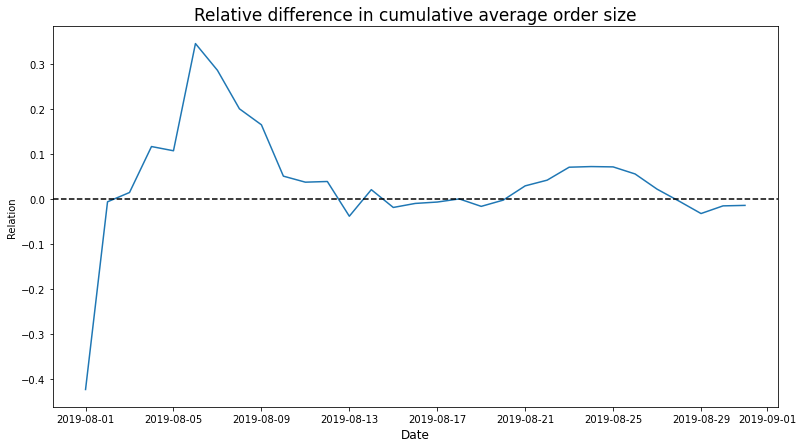

In [341]:
mergedCumulativeAvgOrderSize_ = cumulativeAvgOrderSizeA_.merge(cumulativeAvgOrderSizeB_, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13,7))
plt.title('Relative difference in cumulative average order size', fontsize=17)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Relation')
plt.plot(mergedCumulativeAvgOrderSize['date'], (mergedCumulativeAvgOrderSize_['revenueB']/mergedCumulativeAvgOrderSize_['ordersB'])/(mergedCumulativeAvgOrderSize_['revenueA']/mergedCumulativeAvgOrderSize_['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--');

Graphs that we see correlate with conclusions that we made. Revenue is higher for group B and differnce in average order size for two groups gravitates towards zero